# <center>MIE1624 – Introduction to Data Science and Analytics</center>

## <center>Assignment 1</center>


#### <center>Yunjie Xu 1008601951</center>    


In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from scipy import stats
import random

In [2]:
# warning remove 
import warnings
warnings.filterwarnings("ignore")

## 1. Data Cleaning 


    * Import the dataset and drop column 'Unnamed: 0' due to meaningless
    * Dealing with multiple choice questions

### 1.1 Import dataset
    1. I drop 'Unnamed: 0' column, because the column looks like without meaning of analysis.
    2. It is needless to drop any observations based on the time perspective as the minimum time from start to finish is about 2 minutes.

In [3]:
df = pd.read_csv('clean_kaggle_data.csv',low_memory=False)
df = df.iloc[:,1:370] 

#pd.set_option('display.max_columns', None)
df

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15386,323,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15387,910,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15388,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15389,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [4]:
min(df['Time from Start to Finish (seconds)'].values)

121

### 1.2 Dealing with MCQ

      There are many questions listed in 'clean_kaggle_data.csv' are multiple choice questions. The replier can select one or more even None based on their background, thus many columns with many missing values since people who answered the question may not select that choice but select other choices. I may lose many useful information, if I simply drop these columns. Thus, I combine each multiple choice question into one single column with numerical values based on their selection. For example, there are 13 parts including 11 specific language skills, one other skill, and one None (means no skill), if the one who selected Python and Other as his choices, therefore, the value for Q7 will be 1+1=2, if the one who did not respond or selected None as his choice, the value for Q7 is. The reason why I doing this is that I assume that the individuals may earn more if he or she master more languages, platforms, skills, and algorithms...


In [5]:
# Question 7
Q_7 = ['Q7_Part_1','Q7_Part_2','Q7_Part_3','Q7_Part_4','Q7_Part_5',
      'Q7_Part_6','Q7_Part_7','Q7_Part_8','Q7_Part_9','Q7_Part_10',
      'Q7_Part_11','Q7_Part_12','Q7_OTHER']

MCQ = ['Q7_Part_1','Q7_Part_2','Q7_Part_3','Q7_Part_4','Q7_Part_5',
      'Q7_Part_6','Q7_Part_7','Q7_Part_8','Q7_Part_9','Q7_Part_10',
      'Q7_Part_11','Q7_OTHER']

df_m = df[MCQ]
df_m = df_m.fillna(0)

# df[MCQ].sum(axis=1).astype(int)
df.insert(7, "Languages", df[MCQ].sum(axis=1).astype(int))
df.drop(Q_7,axis=1,inplace=True)

In [6]:
# Question 9
Q_9 = ['Q9_Part_1','Q9_Part_2','Q9_Part_3','Q9_Part_4','Q9_Part_5',
       'Q9_Part_6','Q9_Part_7','Q9_Part_8','Q9_Part_9','Q9_Part_10',
       'Q9_Part_11','Q9_Part_12','Q9_OTHER']

MCQ = ['Q9_Part_1','Q9_Part_2','Q9_Part_3','Q9_Part_4','Q9_Part_5',
       'Q9_Part_6','Q9_Part_7','Q9_Part_8','Q9_Part_9','Q9_Part_10',
       'Q9_Part_11','Q9_Part_12']

df_m = df[MCQ]
df_m = df_m.fillna(0)

# df[MCQ].sum(axis=1).astype(int)
df.insert(9, "IDE", df[MCQ].sum(axis=1).astype(int))
df.drop(Q_9,axis=1,inplace=True)

In [7]:
# Question 10
Q_10 = ['Q10_Part_1','Q10_Part_2','Q10_Part_3','Q10_Part_4','Q10_Part_5',
        'Q10_Part_6','Q10_Part_7','Q10_Part_8','Q10_Part_9','Q10_Part_10',
        'Q10_Part_11','Q10_Part_12','Q10_Part_13','Q10_Part_14','Q10_Part_15',
        'Q10_Part_16','Q10_OTHER']

MCQ = ['Q10_Part_1','Q10_Part_2','Q10_Part_3','Q10_Part_4','Q10_Part_5',
       'Q10_Part_6','Q10_Part_7','Q10_Part_8','Q10_Part_9','Q10_Part_10',
       'Q10_Part_11','Q10_Part_12','Q10_Part_13','Q10_Part_14','Q10_Part_15',
       'Q10_OTHER']

df_m = df[MCQ]
df_m = df_m.fillna(0)

# df[MCQ].sum(axis=1).astype(int)
df.insert(10, "Hosted Notebook Products", df[MCQ].sum(axis=1).astype(int))
df.drop(Q_10,axis=1,inplace=True)

In [8]:
# Question 12
Q_12 = ['Q12_Part_1','Q12_Part_2','Q12_Part_3','Q12_Part_4','Q12_Part_5',
        'Q12_OTHER']

MCQ = ['Q12_Part_1','Q12_Part_2','Q12_Part_3','Q12_Part_4','Q12_OTHER']

df_m = df[MCQ]
df_m = df_m.fillna(0)

# df[MCQ].sum(axis=1).astype(int)
df.insert(12, "Specialized Hardware", df[MCQ].sum(axis=1).astype(int))
df.drop(Q_12,axis=1,inplace=True)

In [9]:
# Question 14
Q_14 = ['Q14_Part_1','Q14_Part_2','Q14_Part_3','Q14_Part_4','Q14_Part_5',
        'Q14_Part_6','Q14_Part_7','Q14_Part_8','Q14_Part_9','Q14_Part_10',
        'Q14_Part_11','Q14_OTHER']

MCQ = ['Q14_Part_1','Q14_Part_2','Q14_Part_3','Q14_Part_4','Q14_Part_5',
       'Q14_Part_6','Q14_Part_7','Q14_Part_8','Q14_Part_9','Q14_Part_10',
       'Q14_OTHER']

df_m = df[MCQ]
df_m = df_m.fillna(0)

# df[MCQ].sum(axis=1).astype(int)
df.insert(14, "Data Visualization Libraries", df[MCQ].sum(axis=1).astype(int))
df.drop(Q_14,axis=1,inplace=True)

In [10]:
# Question 16
Q_16 = ['Q16_Part_1','Q16_Part_2','Q16_Part_3','Q16_Part_4','Q16_Part_5',
        'Q16_Part_6','Q16_Part_7','Q16_Part_8','Q16_Part_9','Q16_Part_10',
        'Q16_Part_11','Q16_Part_12','Q16_Part_13','Q16_Part_14','Q16_Part_15',
        'Q16_Part_16','Q16_Part_17','Q16_OTHER']

MCQ = ['Q16_Part_1','Q16_Part_2','Q16_Part_3','Q16_Part_4','Q16_Part_5',
        'Q16_Part_6','Q16_Part_7','Q16_Part_8','Q16_Part_9','Q16_Part_10',
        'Q16_Part_11','Q16_Part_12','Q16_Part_13','Q16_Part_14','Q16_Part_15',
        'Q16_Part_16','Q16_OTHER']

df_m = df[MCQ]
df_m = df_m.fillna(0)

# df[MCQ].sum(axis=1).astype(int)
df.insert(16, "Machine Learning Frameworks", df[MCQ].sum(axis=1).astype(int))
df.drop(Q_16,axis=1,inplace=True)

In [11]:
# Question 17
Q_17 = ['Q17_Part_1','Q17_Part_2','Q17_Part_3','Q17_Part_4','Q17_Part_5',
        'Q17_Part_6','Q17_Part_7','Q17_Part_8','Q17_Part_9','Q17_Part_10',
        'Q17_Part_11','Q17_OTHER']

MCQ = ['Q17_Part_1','Q17_Part_2','Q17_Part_3','Q17_Part_4','Q17_Part_5',
       'Q17_Part_6','Q17_Part_7','Q17_Part_8','Q17_Part_9','Q17_Part_10',
       'Q17_OTHER']

df_m = df[MCQ]
df_m = df_m.fillna(0)

# df[MCQ].sum(axis=1).astype(int)
df.insert(17, "ML Algorithms", df[MCQ].sum(axis=1).astype(int))
df.drop(Q_17,axis=1,inplace=True)

In [12]:
# Question 18
Q_18 = ['Q18_Part_1','Q18_Part_2','Q18_Part_3','Q18_Part_4','Q18_Part_5',
        'Q18_Part_6','Q18_OTHER']

MCQ = ['Q18_Part_1','Q18_Part_2','Q18_Part_3','Q18_Part_4','Q18_Part_5',
       'Q18_OTHER']

df_m = df[MCQ]
df_m = df_m.fillna(0)

# df[MCQ].sum(axis=1).astype(int)
df.insert(18, "Computer Vision Methods", df[MCQ].sum(axis=1).astype(int))
df.drop(Q_18,axis=1,inplace=True)

In [13]:
# Question 19
Q_19 = ['Q19_Part_1','Q19_Part_2','Q19_Part_3','Q19_Part_4','Q19_Part_5',
        'Q19_OTHER']

MCQ = ['Q19_Part_1','Q19_Part_2','Q19_Part_3','Q19_Part_4','Q19_OTHER']

df_m = df[MCQ]
df_m = df_m.fillna(0)

# df[MCQ].sum(axis=1).astype(int)
df.insert(19, "NLP Methods", df[MCQ].sum(axis=1).astype(int))
df.drop(Q_19,axis=1,inplace=True)

In [14]:
# Question 24
Q_24 = ['Q24_Part_1','Q24_Part_2','Q24_Part_3','Q24_Part_4','Q24_Part_5',
        'Q24_Part_6','Q24_Part_7','Q24_OTHER']

MCQ = ['Q24_Part_1','Q24_Part_2','Q24_Part_3','Q24_Part_4','Q24_Part_5',
       'Q24_Part_6','Q24_OTHER']

df_m = df[MCQ]
df_m = df_m.fillna(0)

# df[MCQ].sum(axis=1).astype(int)
df.insert(24, "Important Activities", df[MCQ].sum(axis=1).astype(int))
df.drop(Q_24,axis=1,inplace=True)

In [15]:
# Question 27_A
Q27_A = ['Q27_A_Part_1','Q27_A_Part_2','Q27_A_Part_3','Q27_A_Part_4','Q27_A_Part_5',
         'Q27_A_Part_6','Q27_A_Part_7','Q27_A_Part_8','Q27_A_Part_9','Q27_A_Part_10',
         'Q27_A_Part_11','Q27_A_OTHER']

MCQ = ['Q27_A_Part_1','Q27_A_Part_2','Q27_A_Part_3','Q27_A_Part_4','Q27_A_Part_5',
       'Q27_A_Part_6','Q27_A_Part_7','Q27_A_Part_8','Q27_A_Part_9','Q27_A_Part_10',
       'Q27_A_OTHER']

df_m = df[MCQ]
df_m = df_m.fillna(0)

# df[MCQ].sum(axis=1).astype(int)
df.insert(27, "Cloud Computing Platforms", df[MCQ].sum(axis=1).astype(int))
df.drop(Q27_A,axis=1,inplace=True)

In [16]:
# Question 29_A
Q29_A = ['Q29_A_Part_1','Q29_A_Part_2','Q29_A_Part_3','Q29_A_Part_4','Q29_A_OTHER']

MCQ = ['Q29_A_Part_1','Q29_A_Part_2','Q29_A_Part_3','Q29_A_OTHER']

df_m = df[MCQ]
df_m = df_m.fillna(0)

# df[MCQ].sum(axis=1).astype(int)
df.insert(29, "Cloud Computing Products", df[MCQ].sum(axis=1).astype(int))
df.drop(Q29_A,axis=1,inplace=True)

In [17]:
# Question 30_A
Q30_A = ['Q30_A_Part_1','Q30_A_Part_2','Q30_A_Part_3','Q30_A_Part_4','Q30_A_Part_5',
         'Q30_A_Part_6','Q30_A_Part_7','Q30_A_OTHER']

MCQ = ['Q30_A_Part_1','Q30_A_Part_2','Q30_A_Part_3','Q30_A_Part_4','Q30_A_Part_5',
       'Q30_A_Part_6','Q30_A_OTHER']

df_m = df[MCQ]
df_m = df_m.fillna(0)

# df[MCQ].sum(axis=1).astype(int)
df.insert(30, "Data Storage Products", df[MCQ].sum(axis=1).astype(int))
df.drop(Q30_A,axis=1,inplace=True)

In [18]:
# Question 31_A
Q31_A = ['Q31_A_Part_1','Q31_A_Part_2','Q31_A_Part_3','Q31_A_Part_4','Q31_A_Part_5',
         'Q31_A_Part_6','Q31_A_Part_7','Q31_A_Part_8','Q31_A_Part_9','Q31_A_OTHER']

MCQ = ['Q31_A_Part_1','Q31_A_Part_2','Q31_A_Part_3','Q31_A_Part_4','Q31_A_Part_5',
       'Q31_A_Part_6','Q31_A_Part_7','Q31_A_Part_8','Q31_A_OTHER']

df_m = df[MCQ]
df_m = df_m.fillna(0)

# df[MCQ].sum(axis=1).astype(int)
df.insert(31, "Managed ML Products", df[MCQ].sum(axis=1).astype(int))
df.drop(Q31_A,axis=1,inplace=True)

In [19]:
# Question 32_A
Q32_A = ['Q32_A_Part_1','Q32_A_Part_2','Q32_A_Part_3','Q32_A_Part_4','Q32_A_Part_5',
         'Q32_A_Part_6','Q32_A_Part_7','Q32_A_Part_8','Q32_A_Part_9','Q32_A_Part_10',
         'Q32_A_Part_11','Q32_A_Part_12','Q32_A_Part_13','Q32_A_Part_14','Q32_A_Part_15',
         'Q32_A_Part_16','Q32_A_Part_17','Q32_A_Part_18','Q32_A_Part_19','Q32_A_Part_20',
         'Q32_A_OTHER']

MCQ = ['Q32_A_Part_1','Q32_A_Part_2','Q32_A_Part_3','Q32_A_Part_4','Q32_A_Part_5',
         'Q32_A_Part_6','Q32_A_Part_7','Q32_A_Part_8','Q32_A_Part_9','Q32_A_Part_10',
         'Q32_A_Part_11','Q32_A_Part_12','Q32_A_Part_13','Q32_A_Part_14','Q32_A_Part_15',
         'Q32_A_Part_16','Q32_A_Part_17','Q32_A_Part_18','Q32_A_Part_19','Q32_A_OTHER']

df_m = df[MCQ]
df_m = df_m.fillna(0)

# df[MCQ].sum(axis=1).astype(int)
df.insert(32, "Big Data Products", df[MCQ].sum(axis=1).astype(int))
df.drop(Q32_A,axis=1,inplace=True)

In [20]:
# Question 34_A
Q34_A = ['Q34_A_Part_1','Q34_A_Part_2','Q34_A_Part_3','Q34_A_Part_4','Q34_A_Part_5',
         'Q34_A_Part_6','Q34_A_Part_7','Q34_A_Part_8','Q34_A_Part_9','Q34_A_Part_10',
         'Q34_A_Part_11','Q34_A_Part_12','Q34_A_Part_13','Q34_A_Part_14','Q34_A_Part_15',
         'Q34_A_Part_16','Q34_A_OTHER']

MCQ = ['Q34_A_Part_1','Q34_A_Part_2','Q34_A_Part_3','Q34_A_Part_4','Q34_A_Part_5',
        'Q34_A_Part_6','Q34_A_Part_7','Q34_A_Part_8','Q34_A_Part_9','Q34_A_Part_10',
        'Q34_A_Part_11','Q34_A_Part_12','Q34_A_Part_13','Q34_A_Part_14','Q34_A_Part_15',
        'Q34_A_OTHER']

df_m = df[MCQ]
df_m = df_m.fillna(0)

# df[MCQ].sum(axis=1).astype(int)
df.insert(34, "Business Intelligence Tools", df[MCQ].sum(axis=1).astype(int))
df.drop(Q34_A,axis=1,inplace=True)

In [21]:
# Question 36_A
Q36_A = ['Q36_A_Part_1','Q36_A_Part_2','Q36_A_Part_3','Q36_A_Part_4','Q36_A_Part_5',
         'Q36_A_Part_6','Q36_A_Part_7','Q36_A_OTHER']

MCQ = ['Q36_A_Part_1','Q36_A_Part_2','Q36_A_Part_3','Q36_A_Part_4','Q36_A_Part_5',
       'Q36_A_Part_6','Q36_A_OTHER']

df_m = df[MCQ]
df_m = df_m.fillna(0)

# df[MCQ].sum(axis=1).astype(int)
df.insert(36, "AutoML Tools 1", df[MCQ].sum(axis=1).astype(int))
df.drop(Q36_A,axis=1,inplace=True)

In [22]:
# Question 37_A
Q37_A = ['Q37_A_Part_1','Q37_A_Part_2','Q37_A_Part_3','Q37_A_Part_4','Q37_A_Part_5',
         'Q37_A_Part_6','Q37_A_Part_7','Q37_A_OTHER']

MCQ = ['Q37_A_Part_1','Q37_A_Part_2','Q37_A_Part_3','Q37_A_Part_4','Q37_A_Part_5',
       'Q37_A_Part_6','Q37_A_OTHER']

df_m = df[MCQ]
df_m = df_m.fillna(0)

# df[MCQ].sum(axis=1).astype(int)
df.insert(37, "AutoML Tools 2", df[MCQ].sum(axis=1).astype(int))
df.drop(Q37_A,axis=1,inplace=True)

In [23]:
# Question 38_A
Q38_A = ['Q38_A_Part_1','Q38_A_Part_2','Q38_A_Part_3','Q38_A_Part_4','Q38_A_Part_5',
         'Q38_A_Part_6','Q38_A_Part_7','Q38_A_Part_8','Q38_A_Part_9','Q38_A_Part_10',
         'Q38_A_Part_11','Q38_A_OTHER']

MCQ = ['Q38_A_Part_1','Q38_A_Part_2','Q38_A_Part_3','Q38_A_Part_4','Q38_A_Part_5',
       'Q38_A_Part_6','Q38_A_Part_7','Q38_A_Part_8','Q38_A_Part_9','Q38_A_Part_10',
       'Q38_A_OTHER']

df_m = df[MCQ]
df_m = df_m.fillna(0)

# df[MCQ].sum(axis=1).astype(int)
df.insert(38, "Tools for Help Manage ML Experiments", df[MCQ].sum(axis=1).astype(int))
df.drop(Q38_A,axis=1,inplace=True)

In [24]:
# Question 39
Q_39 = ['Q39_Part_1','Q39_Part_2','Q39_Part_3','Q39_Part_4','Q39_Part_5',
         'Q39_Part_6','Q39_Part_7','Q39_Part_8','Q39_Part_9','Q39_OTHER']

MCQ = ['Q39_Part_1','Q39_Part_2','Q39_Part_3','Q39_Part_4','Q39_Part_5',
       'Q39_Part_6','Q39_Part_7','Q39_Part_8','Q39_OTHER']

df_m = df[MCQ]
df_m = df_m.fillna(0)

# df[MCQ].sum(axis=1).astype(int)
df.insert(39, "Publicly to Share", df[MCQ].sum(axis=1).astype(int))
df.drop(Q_39,axis=1,inplace=True)

In [25]:
# Question 40
Q_40 = ['Q40_Part_1','Q40_Part_2','Q40_Part_3','Q40_Part_4','Q40_Part_5',
        'Q40_Part_6','Q40_Part_7','Q40_Part_8','Q40_Part_9','Q40_Part_10',
        'Q40_Part_11','Q40_OTHER']

MCQ = ['Q40_Part_1','Q40_Part_2','Q40_Part_3','Q40_Part_4','Q40_Part_5',
       'Q40_Part_6','Q40_Part_7','Q40_Part_8','Q40_Part_9','Q40_Part_10',
       'Q40_OTHER']

df_m = df[MCQ]
df_m = df_m.fillna(0)

# df[MCQ].sum(axis=1).astype(int)
df.insert(40, "Courses Platforms", df[MCQ].sum(axis=1).astype(int))
df.drop(Q_40,axis=1,inplace=True)

In [26]:
# Question 42
Q_42 = ['Q42_Part_1','Q42_Part_2','Q42_Part_3','Q42_Part_4','Q42_Part_5',
        'Q42_Part_6','Q42_Part_7','Q42_Part_8','Q42_Part_9','Q42_Part_10',
        'Q42_Part_11','Q42_OTHER']

MCQ = ['Q42_Part_1','Q42_Part_2','Q42_Part_3','Q42_Part_4','Q42_Part_5',
       'Q42_Part_6','Q42_Part_7','Q42_Part_8','Q42_Part_9','Q42_Part_10',
       'Q42_OTHER']

df_m = df[MCQ]
df_m = df_m.fillna(0)

# df[MCQ].sum(axis=1).astype(int)
df.insert(42, "Media Sources ", df[MCQ].sum(axis=1).astype(int))
df.drop(Q_42,axis=1,inplace=True)

In [27]:
# Question 27_B
Q27_B = ['Q27_B_Part_1','Q27_B_Part_2','Q27_B_Part_3','Q27_B_Part_4','Q27_B_Part_5',
         'Q27_B_Part_6','Q27_B_Part_7','Q27_B_Part_8','Q27_B_Part_9','Q27_B_Part_10',
         'Q27_B_Part_11','Q27_B_OTHER']

MCQ = ['Q27_B_Part_1','Q27_B_Part_2','Q27_B_Part_3','Q27_B_Part_4','Q27_B_Part_5',
       'Q27_B_Part_6','Q27_B_Part_7','Q27_B_Part_8','Q27_B_Part_9','Q27_B_Part_10',
       'Q27_B_OTHER']

df_m = df[MCQ]
df_m = df_m.fillna(0)

# df[MCQ].sum(axis=1).astype(int)
df.insert(43, "Cloud Computing Platforms (future)", df[MCQ].sum(axis=1).astype(int))
df.drop(Q27_B,axis=1,inplace=True)

In [28]:
# Question 29_B
Q29_B = ['Q29_B_Part_1','Q29_B_Part_2','Q29_B_Part_3','Q29_B_Part_4','Q29_B_OTHER']

MCQ = ['Q29_B_Part_1','Q29_B_Part_2','Q29_B_Part_3','Q29_B_OTHER']

df_m = df[MCQ]
df_m = df_m.fillna(0)

# df[MCQ].sum(axis=1).astype(int)
df.insert(44, "Cloud Computing Products (future)", df[MCQ].sum(axis=1).astype(int))
df.drop(Q29_B,axis=1,inplace=True)

In [29]:
# Question 30_B
Q30_B = ['Q30_B_Part_1','Q30_B_Part_2','Q30_B_Part_3','Q30_B_Part_4','Q30_B_Part_5',
         'Q30_B_Part_6','Q30_B_Part_7','Q30_B_OTHER']

MCQ = ['Q30_B_Part_1','Q30_B_Part_2','Q30_B_Part_3','Q30_B_Part_4','Q30_B_Part_5',
       'Q30_B_Part_6','Q30_B_OTHER']

df_m = df[MCQ]
df_m = df_m.fillna(0)

# df[MCQ].sum(axis=1).astype(int)
df.insert(45, "Data Storage Products (future)", df[MCQ].sum(axis=1).astype(int))
df.drop(Q30_B,axis=1,inplace=True)

In [30]:
# Question 31_B
Q31_B = ['Q31_B_Part_1','Q31_B_Part_2','Q31_B_Part_3','Q31_B_Part_4','Q31_B_Part_5',
         'Q31_B_Part_6','Q31_B_Part_7','Q31_B_Part_8','Q31_B_Part_9','Q31_B_OTHER']

MCQ = ['Q31_B_Part_1','Q31_B_Part_2','Q31_B_Part_3','Q31_B_Part_4','Q31_B_Part_5',
       'Q31_B_Part_6','Q31_B_Part_7','Q31_B_Part_8','Q31_B_OTHER']

df_m = df[MCQ]
df_m = df_m.fillna(0)

# df[MCQ].sum(axis=1).astype(int)
df.insert(46, "Managed ML Products (future)", df[MCQ].sum(axis=1).astype(int))
df.drop(Q31_B,axis=1,inplace=True)

In [31]:
# Question 32_B
Q32_B = ['Q32_B_Part_1','Q32_B_Part_2','Q32_B_Part_3','Q32_B_Part_4','Q32_B_Part_5',
         'Q32_B_Part_6','Q32_B_Part_7','Q32_B_Part_8','Q32_B_Part_9','Q32_B_Part_10',
         'Q32_B_Part_11','Q32_B_Part_12','Q32_B_Part_13','Q32_B_Part_14','Q32_B_Part_15',
         'Q32_B_Part_16','Q32_B_Part_17','Q32_B_Part_18','Q32_B_Part_19','Q32_B_Part_20',
         'Q32_B_OTHER']

MCQ = ['Q32_B_Part_1','Q32_B_Part_2','Q32_B_Part_3','Q32_B_Part_4','Q32_B_Part_5',
       'Q32_B_Part_6','Q32_B_Part_7','Q32_B_Part_8','Q32_B_Part_9','Q32_B_Part_10',
       'Q32_B_Part_11','Q32_B_Part_12','Q32_B_Part_13','Q32_B_Part_14','Q32_B_Part_15',
       'Q32_B_Part_16','Q32_B_Part_17','Q32_B_Part_18','Q32_B_Part_19','Q32_B_OTHER']

df_m = df[MCQ]
df_m = df_m.fillna(0)

# df[MCQ].sum(axis=1).astype(int)
df.insert(47, "Big Data Products (future)", df[MCQ].sum(axis=1).astype(int))
df.drop(Q32_B,axis=1,inplace=True)

In [32]:
# Question 34_B
Q34_B = ['Q34_B_Part_1','Q34_B_Part_2','Q34_B_Part_3','Q34_B_Part_4','Q34_B_Part_5',
         'Q34_B_Part_6','Q34_B_Part_7','Q34_B_Part_8','Q34_B_Part_9','Q34_B_Part_10',
         'Q34_B_Part_11','Q34_B_Part_12','Q34_B_Part_13','Q34_B_Part_14','Q34_B_Part_15',
         'Q34_B_Part_16','Q34_B_OTHER']

MCQ = ['Q34_B_Part_1','Q34_B_Part_2','Q34_B_Part_3','Q34_B_Part_4','Q34_B_Part_5',
       'Q34_B_Part_6','Q34_B_Part_7','Q34_B_Part_8','Q34_B_Part_9','Q34_B_Part_10',
       'Q34_B_Part_11','Q34_B_Part_12','Q34_B_Part_13','Q34_B_Part_14','Q34_B_Part_15',
       'Q34_B_OTHER']

df_m = df[MCQ]
df_m = df_m.fillna(0)

# df[MCQ].sum(axis=1).astype(int)
df.insert(48, "Business Intelligence Tools (future)", df[MCQ].sum(axis=1).astype(int))
df.drop(Q34_B,axis=1,inplace=True)

In [33]:
# Question 36_B
Q36_B = ['Q36_B_Part_1','Q36_B_Part_2','Q36_B_Part_3','Q36_B_Part_4','Q36_B_Part_5',
         'Q36_B_Part_6','Q36_B_Part_7','Q36_B_OTHER']

MCQ = ['Q36_B_Part_1','Q36_B_Part_2','Q36_B_Part_3','Q36_B_Part_4','Q36_B_Part_5',
       'Q36_B_Part_6','Q36_B_OTHER']

df_m = df[MCQ]
df_m = df_m.fillna(0)

# df[MCQ].sum(axis=1).astype(int)
df.insert(49, "AutoML Tools 1 (future)", df[MCQ].sum(axis=1).astype(int))
df.drop(Q36_B,axis=1,inplace=True)

In [34]:
# Question 37_B
Q37_B = ['Q37_B_Part_1','Q37_B_Part_2','Q37_B_Part_3','Q37_B_Part_4','Q37_B_Part_5',
         'Q37_B_Part_6','Q37_B_Part_7','Q37_B_OTHER']

MCQ = ['Q37_B_Part_1','Q37_B_Part_2','Q37_B_Part_3','Q37_B_Part_4','Q37_B_Part_5',
       'Q37_B_Part_6','Q37_B_OTHER']

df_m = df[MCQ]
df_m = df_m.fillna(0)

# df[MCQ].sum(axis=1).astype(int)
df.insert(50, "AutoML Tools 2 (future)", df[MCQ].sum(axis=1).astype(int))
df.drop(Q37_B,axis=1,inplace=True)

In [35]:
# Question 38_B
Q38_B = ['Q38_B_Part_1','Q38_B_Part_2','Q38_B_Part_3','Q38_B_Part_4','Q38_B_Part_5',
         'Q38_B_Part_6','Q38_B_Part_7','Q38_B_Part_8','Q38_B_Part_9','Q38_B_Part_10',
         'Q38_B_Part_11','Q38_B_OTHER']

MCQ = ['Q38_B_Part_1','Q38_B_Part_2','Q38_B_Part_3','Q38_B_Part_4','Q38_B_Part_5',
       'Q38_B_Part_6','Q38_B_Part_7','Q38_B_Part_8','Q38_B_Part_9','Q38_B_Part_10',
       'Q38_B_OTHER']

df_m = df[MCQ]
df_m = df_m.fillna(0)

# df[MCQ].sum(axis=1).astype(int)
df.insert(51, "Tools for Help Manage ML Experiments (future)", df[MCQ].sum(axis=1).astype(int))
df.drop(Q38_B,axis=1,inplace=True)

In [36]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Languages,Q8,IDE,...,Media Sources,Cloud Computing Platforms (future),Cloud Computing Products (future),Data Storage Products (future),Managed ML Products (future),Big Data Products (future),Business Intelligence Tools (future),AutoML Tools 1 (future),AutoML Tools 2 (future),Tools for Help Manage ML Experiments (future)
0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,0,Python,0,...,0,0,0,0,0,0,0,0,0,0
1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,0,Python,0,...,0,0,0,0,0,0,0,0,0,0
2,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,0,Python,0,...,0,0,0,0,0,0,0,0,0,0
3,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,0,Python,0,...,0,0,0,0,0,0,0,0,0,0
4,781,45-49,Man,India,Doctoral degree,Other,< 1 years,0,Python,0,...,0,0,0,0,0,0,0,0,0,0


### 1.3 Dealing with NaN values

    I detect how many NaN values in the dataset after encoding all MCQ. 
    
    1. For Question 8,11,13,15,26,41 I replace missing values with mode.Because the number of missing values are limited.
    
    2. For Question 28,33,35, I don't think these three columns are valuable because of enormous missing values in     these columns. So I delete these.
    

In [37]:
df.isna().sum()

Time from Start to Finish (seconds)                  0
Q1                                                   0
Q2                                                   0
Q3                                                   0
Q4                                                   0
Q5                                                   0
Q6                                                   0
Languages                                            0
Q8                                                 961
IDE                                                  0
Hosted Notebook Products                             0
Q11                                                961
Specialized Hardware                                 0
Q13                                                961
Data Visualization Libraries                         0
Q15                                                961
Machine Learning Frameworks                          0
ML Algorithms                                        0
Computer V

In [38]:
# Question 8&11&13&15&26&41
df['Q8'] = df['Q8'].fillna('Python')
df.rename(columns = {'Q8':'Recommend Language'}, inplace = True)

df['Q11'] = df['Q11'].fillna('A laptop')
df.rename(columns = {'Q11':'Type of Computing Platform'}, inplace = True)

df['Q13'] = df['Q13'].fillna('Never')
df.rename(columns = {'Q13':'Times of using TPU'}, inplace = True)

df['Q15'] = df['Q15'].fillna('Under 1 year')
df.rename(columns = {'Q15':'Years of using ML Methods'}, inplace = True)

df['Q26'] = df['Q26'].fillna('$0 ($USD)')
df.rename(columns = {'Q26':'Budgets Spent on ML Service'}, inplace = True)

df['Q41'] = df['Q41'].fillna('Local development environments (RStudio, JupyterLab, etc.)')
df.rename(columns = {'Q41':'Primary Tool'}, inplace = True)

In [39]:
# Question 28&33&35
df.drop(['Q28','Q33', 'Q35'], axis=1, inplace=True)

### 1.4 Encoding with other variables
    * Because the Question 25 is target value, thus I moved the position of Question 25 to the most right side. 

In [40]:
# Question 25
SalarySer = df['Q25']
df.drop(['Q25'], axis=1, inplace=True)
df['Salary'] = SalarySer

In [41]:
df['Salary'].unique()

array([  30000,   70000,    1000,   40000,   20000,   80000,    3000,
         15000,    7500,   25000,    2000,  125000,   10000,    5000,
         50000,   60000,    4000,  500000,  250000,  150000,  300000,
         90000,  100000,  200000, 1000000])

In [42]:
# Question 1

# df['Q1'].unique()
# array(['50-54', '22-24', '45-49', '30-34', '40-44', '35-39', '18-21','70+', '25-29', '55-59', '60-69'], dtype=object)

df.rename(columns = {'Q1':'Age'}, inplace = True)

     The question 2 is about gender, there are five responses, including Man,Woman,Prefer not to say,Nonbinary,Prefer to self-describe. Becuase the latter three categories only account a small portion. So I combined these three to a new category called 'Gender minority'.
     
     * I encode Man as 0, Woman as 1, Gender minority as 2.

In [43]:
# Question 2

# Integrate those whose gender is other than man and woman to 'Gender minority'.
df['Q2'] = np.where((df['Q2'] == 'Nonbinary'), 'Gender minority', df['Q2'])
df['Q2'] = np.where((df['Q2'] == 'Prefer not to say'), 'Gender minority', df['Q2'])
df['Q2'] = np.where((df['Q2'] == 'Prefer to self-describe'), 'Gender minority', df['Q2'])

df.rename(columns = {'Q2':'Gender'}, inplace = True)

In [44]:
# Question 3&4&5&6
df.rename(columns = {'Q3':'Country'}, inplace = True)
df.rename(columns = {'Q4':'Education'}, inplace = True)
df.rename(columns = {'Q5':'Title'}, inplace = True)
df.rename(columns = {'Q6':'Experience'}, inplace = True)

In [45]:
## cleaning dataset
df

,Time from Start to Finish (seconds),Age,Gender,Country,Education,Title,Experience,Languages,Recommend Language,IDE,...,Cloud Computing Platforms (future),Cloud Computing Products (future),Data Storage Products (future),Managed ML Products (future),Big Data Products (future),Business Intelligence Tools (future),AutoML Tools 1 (future),AutoML Tools 2 (future),Tools for Help Manage ML Experiments (future),Salary
0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,0,Python,0,...,0,0,0,0,0,0,0,0,0,30000
1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,0,Python,0,...,0,0,0,0,0,0,0,0,0,70000
2,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,0,Python,0,...,0,0,0,0,0,0,0,0,0,1000
3,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,0,Python,0,...,0,0,0,0,0,0,0,0,0,40000
4,781,45-49,Man,India,Doctoral degree,Other,< 1 years,0,Python,0,...,0,0,0,0,0,0,0,0,0,40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15386,323,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,0,Python,0,...,0,0,0,0,0,0,0,0,0,4000
15387,910,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,5-10 years,0,Python,0,...,0,0,0,0,0,0,0,0,0,90000
15388,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,0,Python,0,...,0,0,0,0,0,0,0,0,0,20000
15389,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,0,Python,0,...,0,0,0,0,0,0,0,0,0,1000


## 2. Exploratory Data Analysis

    After encoding all variables, I finished the step of cleaning dataset. Thus, the cleaning dataset shows below...
 
### Q.1
    [3pts] Perform exploratory data analysis to analyze the survey dataset and to summarize its main
    characteristics. Present 3 graphical figures that represent different trends in the data. For your
    explanatory data analysis, you can consider Country, Age, Education, Professional Experience, and
    Salary.


In [46]:
df['Gender'].value_counts()

Man                12642
Woman               2482
Gender minority      267
Name: Gender, dtype: int64

In [47]:
Man_per = round((12642/(12642+2482+267)),4)
Woman_per = round((2482/(12642+2482+267)),4)
GM_per = round((267/(12642+2482+267)),4)

print(f'The percentage of Man is {Man_per},Woman is {Woman_per} and Gender minority is {GM_per}')

The percentage of Man is 0.8214,Woman is 0.1613 and Gender minority is 0.0173


#### 1.1 Education level

In [48]:
# Education level
df_edu = df.groupby(["Education",'Gender']).mean().Salary.unstack(0)
df_edu.round(2)

# plt.savefig('f5.png',transparent = True)

Education,Bachelor’s degree,Doctoral degree,I prefer not to answer,Master’s degree,No formal education past high school,Professional doctorate,Some college/university study without earning a bachelor’s degree
Gender,,,,,,,
Gender minority,55381.36,91588.89,119847.83,82198.28,214400.00,216333.33,22230.77
Man,37394.30,75505.36,32386.83,54950.23,34975.61,68952.91,43999.22
Woman,23524.93,46664.16,11669.12,38769.77,26083.33,47385.25,31338.54


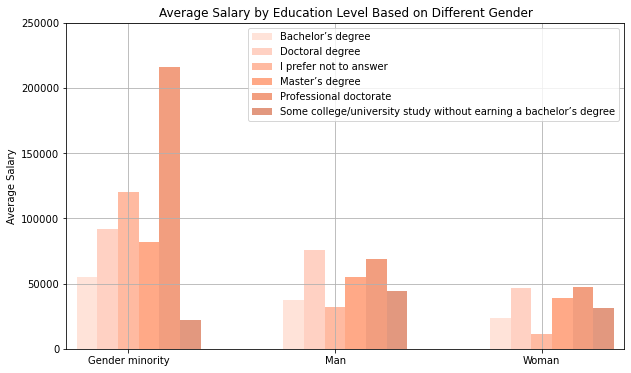

In [49]:
# Plot
pos = list(range(len(df_edu['Bachelor’s degree'])))
pos

width = 0.1

# ploting the bars
fig, ax = plt.subplots(figsize = (10,6))

#1.
plt.bar(pos,df_edu['Bachelor’s degree'],width,alpha=0.5,color='#FFC8B4')

#2.
plt.bar([p+width for p in pos],df_edu['Doctoral degree'],width,alpha=0.5,color='#FFA488')

#3.
plt.bar([p+2*width for p in pos],df_edu['I prefer not to answer'],width,alpha=0.5,color='#FF7744')

#4.
plt.bar([p+3*width for p in pos],df_edu['Master’s degree'],width,alpha=0.5,color='#FF5511')

#5.
plt.bar([p+4*width for p in pos],df_edu['Professional doctorate'],width,alpha=0.5,color='#E63F00')

#6.
plt.bar([p+5*width for p in pos],df_edu['Some college/university study without earning a bachelor’s degree'],width,alpha=0.5,color='#C63300')




ax.set_ylabel('Average Salary') 
ax.set_title('Average Salary by Education Level Based on Different Gender')
ax.set_xticks([p+2*width for p in pos])
ax.set_xticklabels(df_edu.index)

plt.xlim(min(pos)-width,max(pos)+6*width)
plt.ylim(0,250000)

plt.legend(['Bachelor’s degree','Doctoral degree','I prefer not to answer','Master’s degree','Professional doctorate','Some college/university study without earning a bachelor’s degree'],loc = 'upper right')
plt.grid()
plt.savefig('f6.png',transparent = True)
plt.show()

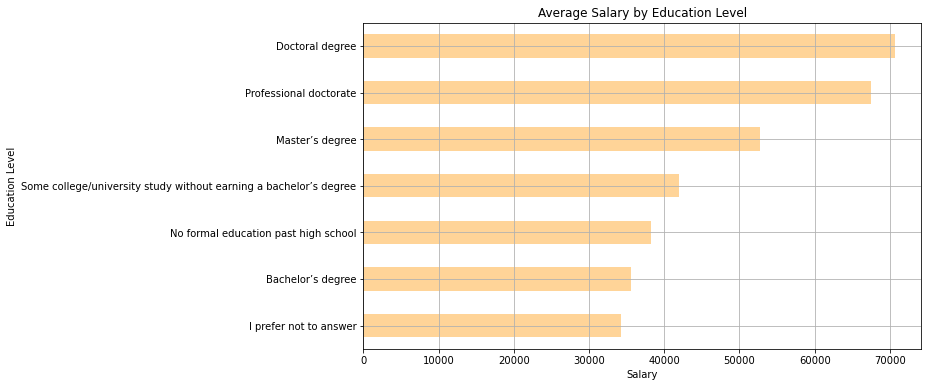

In [50]:
# plot the average salary categorized by education level
# use groupby command to group by the dataframe by education and visualiza the result using
# horizontal bar plot in a descending order
plt.figure(figsize=(10,6))
df_groupby_education = df.groupby(['Education']).mean()
sort_mean_salary_byeducation = df_groupby_education.Salary.sort_values(ascending=True)
sort_mean_salary_byeducation.plot(kind = "barh",alpha=0.5,color='#FFAA33')
plt.xlabel('Salary')
plt.ylabel('Education Level')
plt.title("Average Salary by Education Level")
plt.grid()
plt.savefig('f3.png',transparent = True)
plt.show()

#### 1.2 Years of Professional Experienece

In [51]:
# years of professional experienece
df_exp = df.groupby(['Experience','Gender']).mean().Salary.unstack(0)
df_exp.round(2)

Experience,1-3 years,10-20 years,20+ years,3-5 years,5-10 years,< 1 years,I have never written code
Gender,,,,,,,
Gender minority,41905.66,73166.67,133829.27,78841.46,125894.23,23267.86,97937.50
Man,29037.55,85957.47,107050.00,41105.76,62538.85,22540.01,26448.91
Woman,20479.33,66486.55,75792.68,35363.05,50103.86,22803.06,26494.23


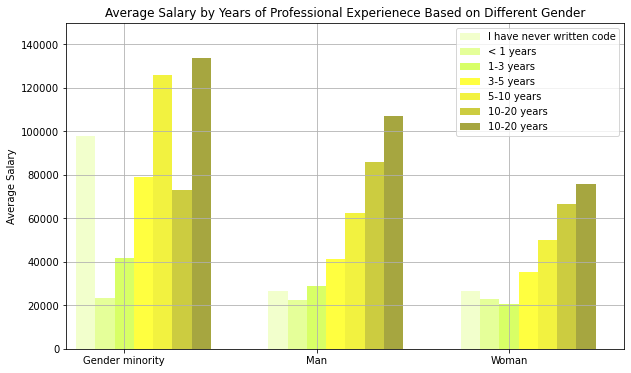

In [52]:
# Plot
pos = list(range(len(df_exp['1-3 years'])))
pos

width = 0.1

# ploting the bars
fig, ax = plt.subplots(figsize = (10,6))

#1.
plt.bar(pos,df_exp['I have never written code'],width,alpha=0.75,color='#EEFFBB')

#2.
plt.bar([p+ width for p in pos],df_exp['< 1 years'],width,alpha=0.75,color='#DDFF77')

#3.7
plt.bar([p+ 2*width for p in pos],df_exp['1-3 years'],width,alpha=0.75,color='#CCFF33')

#4.
plt.bar([p+3*width for p in pos],df_exp['3-5 years'],width,alpha=0.75,color='#FFFF00')

#5.
plt.bar([p+4*width for p in pos],df_exp['5-10 years'],width,alpha=0.75,color='#EEEE00')

#6.
plt.bar([p+5*width for p in pos],df_exp['10-20 years'],width,alpha=0.75,color='#BBBB00')

#7.
plt.bar([p+6*width for p in pos],df_exp['20+ years'],width,alpha=0.75,color='#888800')




ax.set_ylabel('Average Salary') 
ax.set_title('Average Salary by Years of Professional Experienece Based on Different Gender')
ax.set_xticks([p+2*width for p in pos])
ax.set_xticklabels(df_exp.index)

plt.xlim(min(pos)-width,max(pos)+8*width)
plt.ylim(0,150000)

plt.legend(['I have never written code','< 1 years','1-3 years','3-5 years','5-10 years','10-20 years','10-20 years'],loc = 'upper right')
plt.grid()
plt.savefig('f8.png',transparent = True)
plt.show()

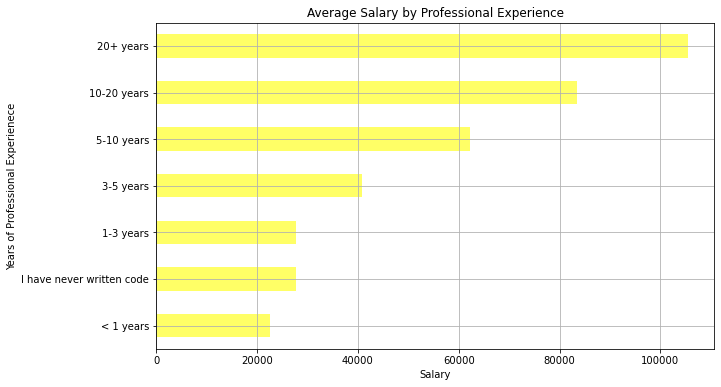

In [53]:
# plot the average salary categorized by years of professional experienece
# use groupby command to group by the dataframe by professional experienece and 
# visualiza the result using horizontal bar plot in a descending order
plt.figure(figsize=(10,6))
df_groupby_age = df.groupby(["Experience"]).mean()
sort_mean_salary_byage = df_groupby_age.Salary.sort_values(ascending=True)
sort_mean_salary_byage.plot(kind = "barh",alpha=0.75,color='#FFFF33')
plt.xlabel('Salary')
plt.ylabel('Years of Professional Experienece')
plt.title("Average Salary by Professional Experience")
plt.grid()
plt.savefig('f4.png',transparent = True)
plt.show()

#### 1.3 Age

In [54]:
# Age 
df_age = df.groupby(['Age','Gender']).mean().Salary.unstack(0)
df_age.round(2)

Age,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-69,70+
Gender,,,,,,,,,,,
Gender minority,20687.50,41882.35,69221.15,82434.21,83700.00,113782.61,109500.00,43833.33,152800.00,162818.18,250333.33
Man,18570.74,20501.80,29552.17,49040.06,61222.60,68662.74,86640.45,84874.81,98720.18,87429.09,92761.63
Woman,4211.23,15560.91,24333.88,38696.78,46903.96,58293.99,48517.86,70841.58,76327.59,56814.81,53200.00


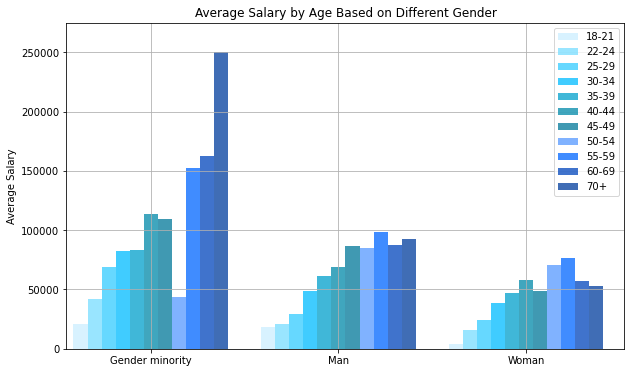

In [55]:
# Plot
pos = list(range(len(df_age['18-21'])))
pos

width = 0.075

# ploting the bars
fig, ax = plt.subplots(figsize = (10,6))

#1.
plt.bar(pos,df_age['18-21'],width,alpha=0.75,color='#CCEEFF')

#2.
plt.bar([p+ width for p in pos],df_age['22-24'],width,alpha=0.75,color='#77DDFF')

#3.7
plt.bar([p+ 2*width for p in pos],df_age['25-29'],width,alpha=0.75,color='#33CCFF')

#4.
plt.bar([p+3*width for p in pos],df_age['30-34'],width,alpha=0.75,color='#00BBFF')

#5.
plt.bar([p+4*width for p in pos],df_age['35-39'],width,alpha=0.75,color='#009FCC')

#6.
plt.bar([p+5*width for p in pos],df_age['40-44'],width,alpha=0.75,color='#0088A8')

#7.
plt.bar([p+6*width for p in pos],df_age['45-49'],width,alpha=0.75,color='#007799')

#8.
plt.bar([p+7*width for p in pos],df_age['50-54'],width,alpha=0.75,color='#5599FF')

#9.
plt.bar([p+8*width for p in pos],df_age['55-59'],width,alpha=0.75,color='#0066FF')

#10.
plt.bar([p+9*width for p in pos],df_age['60-69'],width,alpha=0.75,color='#0044BB')

#11.
plt.bar([p+10*width for p in pos],df_age['70+'],width,alpha=0.75,color='#003C9D')


ax.set_ylabel('Average Salary') 
ax.set_title('Average Salary by Age Based on Different Gender')
ax.set_xticks([p+5*width for p in pos])
ax.set_xticklabels(df_age.index)

plt.xlim(min(pos)-width,max(pos)+12*width)
plt.ylim(0,275000)

plt.legend(['18-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-69','70+'],loc = 'upper right')
plt.grid()
plt.savefig('f10.png',transparent = True)
plt.show()

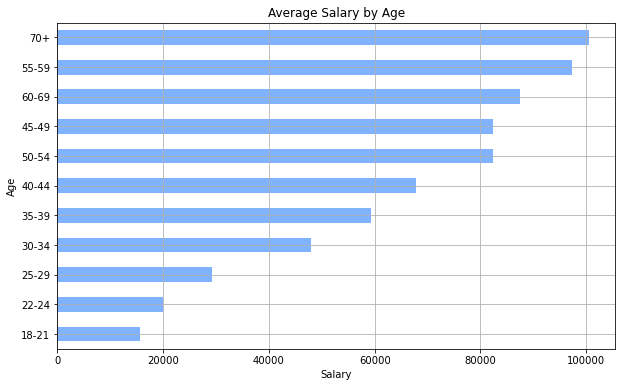

In [56]:
plt.figure(figsize=(10,6))
df_groupby_age = df.groupby(['Age']).mean()
sort_mean_salary_byage = df_groupby_age.Salary.sort_values(ascending=True)
sort_mean_salary_byage.plot(kind = "barh",alpha=0.5,color='#0066FF')
plt.xlabel('Salary')
plt.ylabel('Age')
plt.title("Average Salary by Age")
plt.grid()
plt.savefig('f2.png',transparent = True)
plt.show()

#### 1.4 Country

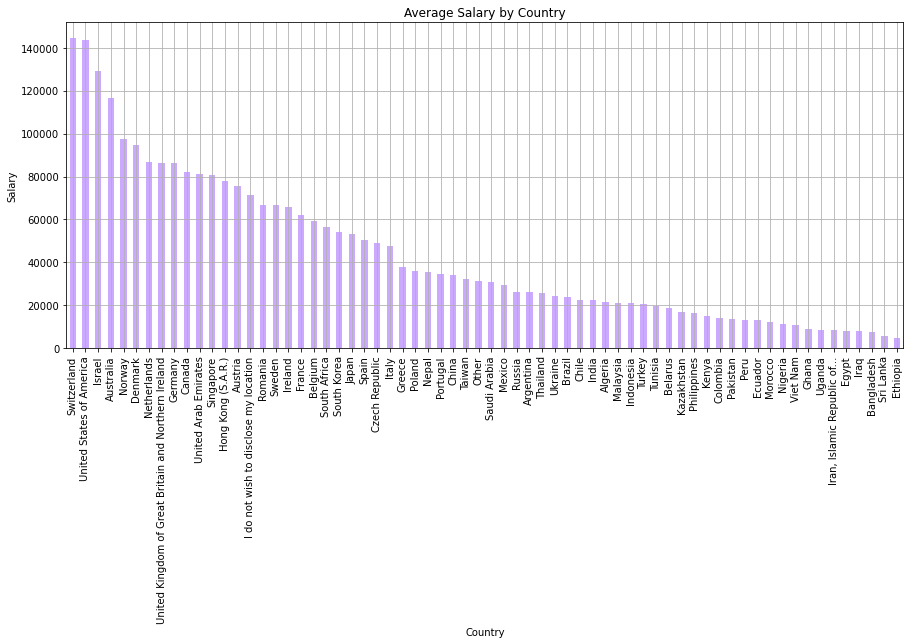

In [57]:
# Country
# plot the sorted mean salaries gourped by each country
# use groupby command to group by the dataframe by country and plot the column Q25 using bar chart in ascending order
plt.figure(figsize=(15,6))
df_groupby_country = df.groupby(["Country"]).mean()
sort_mean_salary_bycountry = df_groupby_country.Salary.sort_values(ascending=False)
sort_mean_salary_bycountry.plot.bar(alpha=0.5,color='#9955FF')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.title("Average Salary by Country")
plt.grid()
plt.savefig('f1.png',transparent = True)
plt.show()

## 3. Statistical Analysis 

### Q2
    [4pts] Estimating the difference between average salary (Q25) of men vs. women (Q2)

#### a.   
    a.[0.5pts] Compute and report descriptive statistics for each group (remove missing data, if
    necessary).
    
    There are not exsiting missing data since the dataframe have been cleaned.

In [58]:
df_Man = df[df['Gender'] == "Man"]
df_Man_salary = df_Man[['Gender','Salary']]
df_Woman = df[df['Gender'] == "Woman"]
df_Woman_salary = df_Woman[['Gender','Salary']]

# initialize data of lists.
data = {'Man': np.linalg.norm(df_Man_salary.describe().values, axis=1),
        'Woman': np.linalg.norm(df_Woman_salary.describe().values, axis=1)}
  
# Creates pandas DataFrame.
df_2a = pd.DataFrame(data, 
                  index=df_Woman_salary.describe().index)

df_2a = df_2a.rename_axis('Salary',axis=1)
df_2a.round(2)

Salary,Man,Woman
count,12642.00,2482.00
mean,51193.60,34816.88
std,99979.27,72017.35
min,1000.00,1000.00
25%,2000.00,1000.00
50%,20000.00,7500.00
75%,60000.00,50000.00
max,1000000.00,1000000.00


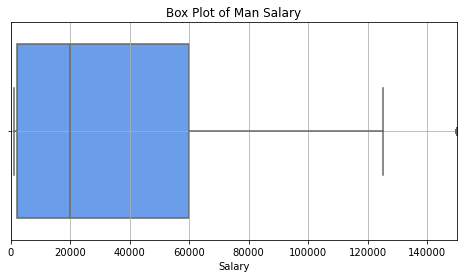

In [59]:
plt.figure(figsize=(8, 4))
plt.title("Box Plot of Man Salary")
sns.boxplot(df_Man_salary.Salary,color='#5599FF')
plt.xlim(0,150000)
plt.grid()
plt.savefig('f12.png',transparent = True)
plt.show()

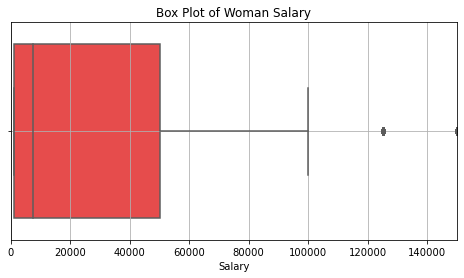

In [60]:
plt.figure(figsize=(8, 4))
plt.title("Box Plot of Woman Salary")
sns.boxplot(df_Woman_salary.Salary,color='#FF3333')
plt.xlim(0,150000)
plt.grid()
plt.savefig('f13.png',transparent = True)
plt.show()

#### b.   
    b.[0.5pts] If suitable, perform a two-sample t-test with a 0.05 threshold. Explain your
    rationale.
    
    Since the p-value from the T-test result is much smaller than 0.05 threshold, thus reject the null hypothesis shoudl be rejected. So, I can conclude that the difference of mean salaries of men and women is statistically significant. However, since two data samples are not normally distribured based on that both two histgarms do not show like a bell shape. So the T-test assumptions are violated. Thus, this conclusion may not be reliable.

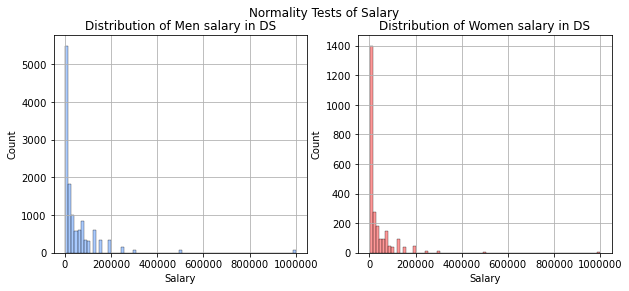

In [61]:
#plot 1:
plt.figure(figsize=(10,4))

#plot Man:
plt.subplot(1, 2, 1)
df_Man_salary_plot = sns.histplot(df_Man_salary['Salary'], bins=75,alpha=0.5,color='#5599FF')
df_Man_salary_plot.ticklabel_format(style='plain')
plt.title("Distribution of Men salary in DS")
plt.grid()

#plot Woman:
plt.subplot(1, 2, 2)
df_Woman_salary_plot = sns.histplot(df_Woman_salary['Salary'], bins=75,alpha=0.5,color='#FF3333')
df_Woman_salary_plot.ticklabel_format(style='plain')
plt.title("Distribution of Women salary in DS")
plt.grid()

plt.suptitle("Normality Tests of Salary")
plt.savefig('f14.png',transparent = True)
plt.show()

In [62]:
t_test = stats.ttest_ind(df_Man_salary['Salary'],df_Woman_salary['Salary'], equal_var = False)
t_test

Ttest_indResult(statistic=9.649519756229287, pvalue=7.952919386918026e-22)

#### c.
    c. [1.5pts] Bootstrap your data for comparing the mean of salary (Q25) for the two groups.
    Note that the number of instances you sample from each group should be relative to its
    size. Use 1000 replications. Plot two bootstrapped distributions (for men and women) and
    the distribution of the difference in means.

In [63]:
msize = int(df[df['Gender'] == 'Man'].shape[0] / 10)
fsize = int(df[df['Gender'] == 'Woman'].shape[0] / 10)

# Bootstrapping the men samples, with 1000 replications.
random.seed(123)
man_sam_mean = []
for i in range(1000):
    sam = random.sample(list(df_Man_salary['Salary'].values), k = msize)
    man_sam_mean.append(np.mean(sam))

# Bootstrapping the women samples, with 1000 replications.
random.seed(123)
women_sam_mean = []
for i in range(1000):
    sam = random.sample(list(df_Woman_salary['Salary'].values), k = fsize)
    women_sam_mean.append(np.mean(sam))
    
# np.mean(men_sam_mean),np.mean(women_sam_mean)
print(f'The bootstrapped mean for man is {np.mean(man_sam_mean).round(2)},and the bootstrapped mean for woman is {np.mean(women_sam_mean).round(2)}.')


The bootstrapped mean for man is 51054.97,and the bootstrapped mean for woman is 34792.43.


    Firstly, I determine the simulation sample sizes of men and women, using 1/10 of the original data.Then I     bootstrapped the men and woman samples separately. Last, I got man and woman bootstrapped mean and I found that both man and woman's bootstrapped mean are very close to the actual mean of its salary.

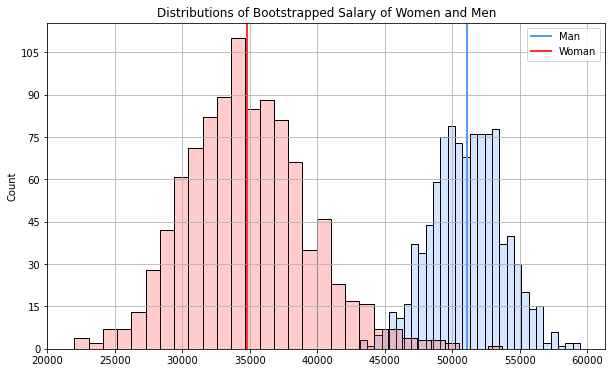

In [64]:

# plot the distriburions of bootstrapped data of two genders on the same graph
plt.figure(figsize=(10,6))

bootstrap_man_mean = sns.histplot(man_sam_mean, color='#5599FF',alpha=0.25,bins=30)
bootstrap_woman_mean = sns.histplot(women_sam_mean, color='#FF3333',alpha=0.25,bins=30)

plt.axvline(np.mean(man_sam_mean), color='#5599FF', linewidth=2)
plt.axvline(np.mean(women_sam_mean), color='#FF3333', linewidth=2)

plt.xticks(np.arange(20000, 65000, 5000))
plt.yticks(np.arange(0, 120, 15))
plt.title('Distributions of Bootstrapped Salary of Women and Men')
plt.legend(['Man','Woman'],loc='upper right')
plt.grid()
plt.savefig('f15.png',transparent = True)
plt.show()

In [65]:
# Calculate the difference in means of salary for men and women.
diff = []
for i in range(len(man_sam_mean)):
    diff.append(man_sam_mean[i] - women_sam_mean[i])
    
print(f'The mean difference in mean salary of men and women is {np.mean(diff).round(2)}.')

The mean difference in mean salary of men and women is 16262.53.


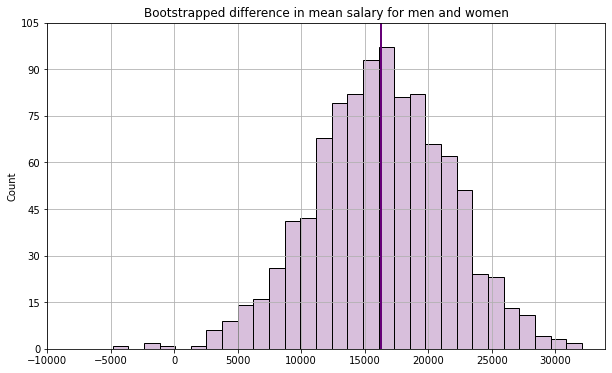

In [66]:
# plot the distribution of the difference in means
plt.figure(figsize=(10,6))

difference_plot = sns.histplot(diff, color = "#660077", alpha=0.25, bins = 30)
plt.axvline(np.mean(diff), color="#660077", linewidth=2)

plt.xticks(np.arange(-10000, 35000, 5000))
plt.yticks(np.arange(0, 120, 15))
plt.title('Bootstrapped difference in mean salary for men and women')
plt.grid()
plt.savefig('f16.png',transparent = True)
plt.show()

#### d.
    d.[0.5pts] If suitable, perform a two-sample t-test with a 0.05 threshold on the bootstrapped
    data. Explain your rationale.
    
    The p-value of our t-test is statistically significant with $\alpha = 0.05$. We thus reject the null hypothesis that there is no difference between mean salary of men and women in the data science field, based on bootstrapped data. Thus I can conclude that the difference of mean salaries of men and women is statistically significant (both bootstrapped distribution distribute normally, the test assumption can be satisfied in this time). 

In [67]:
# The t-test (with unequal variances of two populations). Since the sample size are huge, it follows
# an approximately normal distribution, and t-test is valid.
t_test_bs = stats.ttest_ind(man_sam_mean, women_sam_mean, equal_var = False)
t_test_bs

Ttest_indResult(statistic=98.13923778960586, pvalue=0.0)

#### e.   
    e.[1pts] Comment on your findings.
    
    1. The bootstrap is a method of doing inference in a way that does not require assuming a parametric form for the population distribution. 
    
    2. Based on this question the spread of mean salary of men and women are significantly different, based on the
    Distributions of Bootstrapped Salary of Women and Men; This verfied that I should set ' equal_var = False' when
    did t-test
    
    3. Based on this question,there is a high statistically significant difference between mean salary of men and women in the data science field. The difference based on bootstrapping is 16467.47.
   

### Q3 
    [5pts] Select “highest level of formal education” (Q4) from the dataset and repeat steps a to e,
    this time use analysis of variance (ANOVA) instead of t-test for hypothesis testing to compare the
    means of salary for three groups (Bachelor’s degree, Master’s degree, and Doctoral degree)
    [0.75pts for a; 0.5 pts for b; 2pts for c; 0.75 pts for d; 1pt for e].
    
#### a.

In [68]:
# Bachelor’s degree
df_Bachelor = df[df['Education'] == "Bachelor’s degree"]
df_Bachelor_salary = df_Bachelor[['Gender','Salary']]

# Master’s degree
df_Master = df[df['Education'] == "Master’s degree"]
df_Master_salary = df_Master[['Gender','Salary']]

# Doctoral degree
df_Doctoral = df[df['Education'] == "Doctoral degree"]
df_Doctoral_salary = df_Doctoral[['Gender','Salary']]

# initialize data of lists.
data = {'Bachelor’s degree': np.linalg.norm(df_Bachelor_salary.describe().values, axis=1),
        'Master’s degree': np.linalg.norm(df_Master_salary.describe().values, axis=1),
         'Doctoral degree':np.linalg.norm(df_Doctoral_salary.describe().values, axis=1)}
  
# Creates pandas DataFrame.
df_3a = pd.DataFrame(data, 
                  index=df_Bachelor_salary.describe().index)

df_3a = df_3a.rename_axis('Salary',axis=1)
df_3a.round(2)

Salary,Bachelor’s degree,Master’s degree,Doctoral degree
count,4777.00,6799.00,2217.00
mean,35578.29,52706.87,70641.18
std,89382.06,90928.79,117160.95
min,1000.00,1000.00,1000.00
25%,1000.00,3000.00,4000.00
50%,7500.00,25000.00,40000.00
75%,40000.00,70000.00,90000.00
max,1000000.00,1000000.00,1000000.00


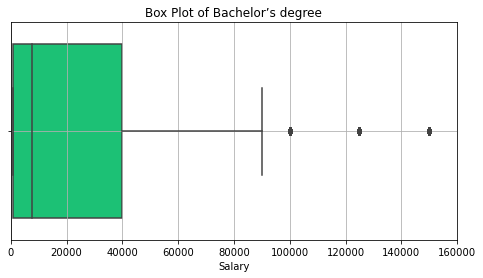

In [69]:
plt.figure(figsize=(8, 4))
plt.title("Box Plot of Bachelor’s degree")
sns.boxplot(df_Bachelor_salary.Salary,color='#00DD77')
plt.xlim(0,160000)
plt.grid()
plt.savefig('f18.png',transparent = True)
plt.show()

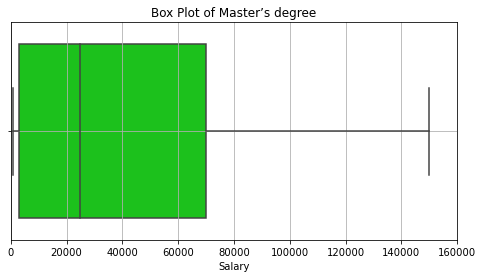

In [70]:
plt.figure(figsize=(8, 4))
plt.title("Box Plot of Master’s degree")
sns.boxplot(df_Master_salary.Salary,color='#00DD00')
plt.xlim(0,160000)
plt.grid()
plt.savefig('f19.png',transparent = True)
plt.show()

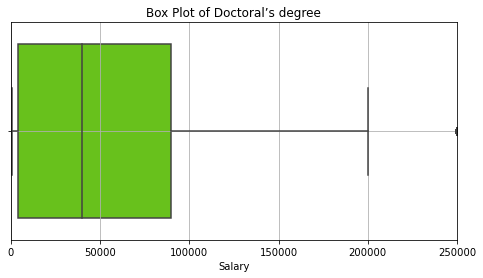

In [71]:
plt.figure(figsize=(8, 4))
plt.title("Box Plot of Doctoral’s degree")
sns.boxplot(df_Doctoral_salary.Salary,color='#66DD00')
plt.xlim(0,250000)
plt.grid()
plt.savefig('f20.png',transparent = True)
plt.show()

#### b.
    
     before I apply ANOVA test, I need check if the variance of bachelor, master, and doctoral are homogeneous. And since the variacne of bachelor salary is very close to the variance of master salary, however, the the doctoral salary is relatively larger than them. Thus, I don't think equal variance assumption can be meet if we did the ANOVA test here. But I still do the ANOVA test primarily below. 

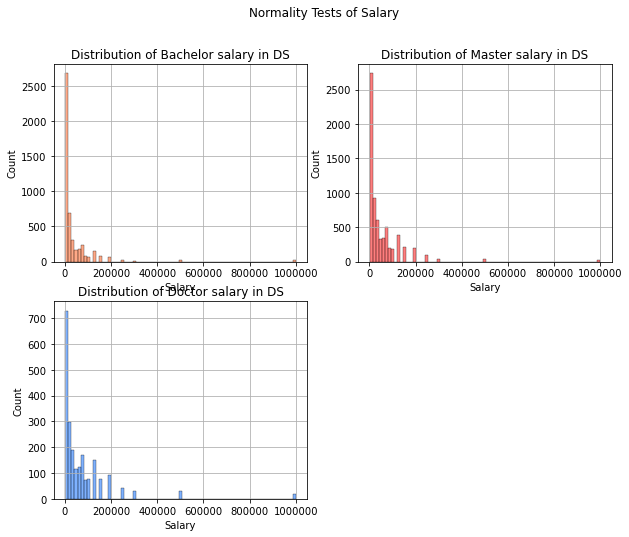

In [72]:
## Normality Checking
#plot 1:
plt.figure(figsize=(10,8))

#plot Bachelor:
plt.subplot(2, 2, 1)
df_Bachelor_salary_plot = sns.histplot(df_Bachelor_salary['Salary'], bins=75,alpha=0.5,color='#FF5511')
df_Bachelor_salary_plot.ticklabel_format(style='plain')
plt.title("Distribution of Bachelor salary in DS")
plt.grid()

#plot Master:
plt.subplot(2, 2, 2)
df_Master_salary_plot = sns.histplot(df_Master_salary['Salary'], bins=75,alpha=0.5,color='#FF0000')
df_Master_salary_plot.ticklabel_format(style='plain')
plt.title("Distribution of Master salary in DS")
plt.grid()

#plot Doctor:
plt.subplot(2, 2, 3)
df_Doctoral_salary_plot = sns.histplot(df_Doctoral_salary['Salary'], bins=75,alpha=0.5,color='#0066FF')
df_Doctoral_salary_plot.ticklabel_format(style='plain')
plt.title("Distribution of Doctor salary in DS")
plt.grid()

plt.suptitle("Normality Tests of Salary")
plt.savefig('f21.png',transparent = True)
plt.show()

In [73]:
## Variance checking
# Bachelor’s degree
print(np.std(df_Bachelor_salary.Salary) / np.std(df_Master_salary.Salary))

# Master’s degree
print(np.std(df_Master_salary.Salary) / np.std(df_Doctoral_salary.Salary))

# Doctoral’s degree
print(np.std(df_Bachelor_salary.Salary) / np.std(df_Doctoral_salary.Salary))

0.9829590969708605
0.776219499588062
0.7629920183662547


In [74]:
f_test = stats.f_oneway(df_Bachelor_salary.Salary, df_Master_salary.Salary, df_Doctoral_salary.Salary)
f_test

F_onewayResult(statistic=109.75776160573479, pvalue=5.107696325253651e-48)

    From the F test above, I got a very small p-value (almost 0), so we reject the null hypothesis that the mean salary of the three groups are the the same. Thus, the alternative hypothesis should be taken, and I can conclude that at least one group mean is different than others.
    
#### c.

In [75]:
Bsize = int(df[df['Education'] == "Bachelor’s degree"].shape[0] / 10)
Msize = int(df[df['Education'] == "Master’s degree"].shape[0] / 10)
Dsize = int(df[df['Education'] == "Doctoral degree"].shape[0] / 10)

# Bootstrapping the Bachelor’s degree samples, with 1000 replications.
random.seed(123)
Bachelor_sam_mean = []
for i in range(1000):
    sam = random.sample(list(df_Bachelor_salary['Salary'].values), k = Bsize)
    Bachelor_sam_mean.append(np.mean(sam))

# Bootstrapping the Master’s degree samples, with 1000 replications.
random.seed(123)
Master_sam_mean = []
for i in range(1000):
    sam = random.sample(list(df_Master_salary['Salary'].values), k = Msize)
    Master_sam_mean.append(np.mean(sam))

# Bootstrapping the Doctoral’s degree samples, with 1000 replications.
random.seed(123)
Doctoral_sam_mean = []
for i in range(1000):
    sam = random.sample(list(df_Doctoral_salary['Salary'].values), k = Dsize)
    Doctoral_sam_mean.append(np.mean(sam))
    
# np.mean(men_sam_mean),np.mean(women_sam_mean)
print(f'The mean salary of Bachelor is {np.mean(Bachelor_sam_mean).round(2)}, Master is {np.mean(Master_sam_mean).round(2)}, and Doctoral is {np.mean(Doctoral_sam_mean).round(2)}. ')



The mean salary of Bachelor is 35606.43, Master is 52729.49, and Doctoral is 70998.15. 


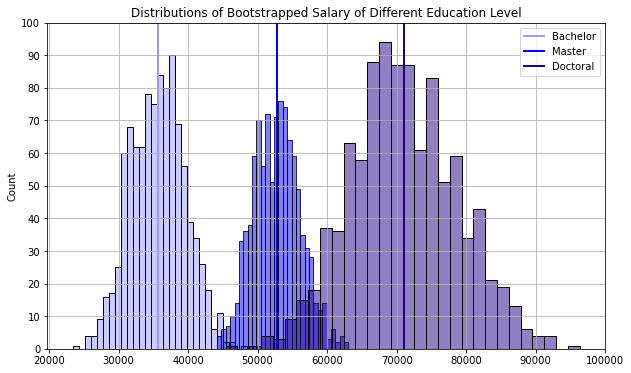

In [76]:
# plot the distriburions of bootstrapped data of two genders on the same graph
plt.figure(figsize=(10,6))

bootstrap_Bachelor_mean = sns.histplot(Bachelor_sam_mean, color='#9999FF',alpha=0.5,bins=30)
bootstrap_Master_mean = sns.histplot(Master_sam_mean, color='#0000FF',alpha=0.5,bins=30)
bootstrap_Doctoral_mean = sns.histplot(Doctoral_sam_mean, color='#220088',alpha=0.5,bins=30)

plt.axvline(np.mean(Bachelor_sam_mean), color='#9999FF', linewidth=2)
plt.axvline(np.mean(Master_sam_mean), color='#0000FF', linewidth=2)
plt.axvline(np.mean(Doctoral_sam_mean), color='#220088', linewidth=2)

plt.xticks(np.arange(20000, 105000, 10000))
plt.yticks(np.arange(0, 110, 10))
plt.title('Distributions of Bootstrapped Salary of Different Education Level')
plt.legend(['Bachelor','Master','Doctoral'],loc='upper right')
plt.grid()
plt.savefig('f22.png',transparent = True)
plt.show()

In [77]:
# Calculate the difference in means of salary for Doctoral and Master
diff_1 = []
for i in range(len(Doctoral_sam_mean)):
    diff_1.append(Doctoral_sam_mean[i] - Master_sam_mean[i])
    
print(f'The mean difference in mean salary of Doctoral and Master is {np.mean(diff_1).round(2)}.')

The mean difference in mean salary of Doctoral and Master is 18268.67.


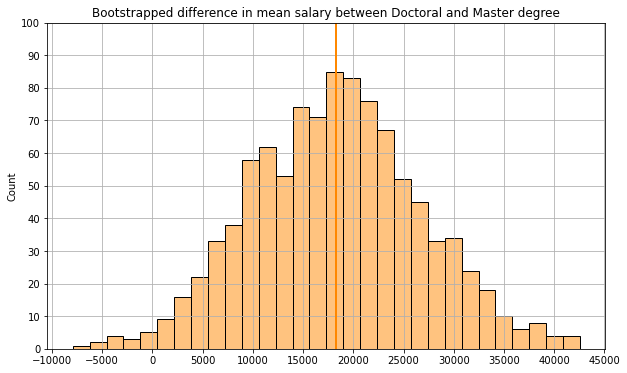

In [78]:
# plot the distribution of the difference in means
plt.figure(figsize=(10,6))

difference_plot = sns.histplot(diff_1, color = "#FF8800", alpha=0.5, bins = 30)
plt.axvline(np.mean(diff_1), color="#FF8800", linewidth=2)

plt.xticks(np.arange(-10000, 50000, 5000))
plt.yticks(np.arange(0, 110, 10))
plt.title('Bootstrapped difference in mean salary between Doctoral and Master degree')
plt.grid()
plt.savefig('f23.png',transparent = True)
plt.show()

In [79]:
# Calculate the difference in means of salary for Doctoral and Bachelor
diff_2 = []
for i in range(len(Doctoral_sam_mean)):
    diff_2.append(Doctoral_sam_mean[i] - Bachelor_sam_mean[i])
    
print(f'The mean difference in mean salary of Doctoral and Bachelor is {np.mean(diff_2).round(2)}.')

The mean difference in mean salary of Doctoral and Bachelor is 35391.72.


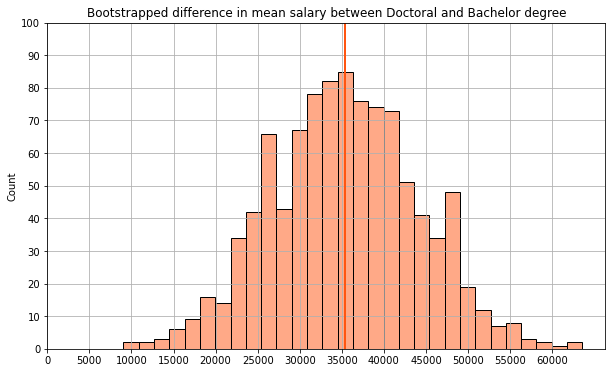

In [80]:
# plot the distribution of the difference in means
plt.figure(figsize=(10,6))

difference_plot = sns.histplot(diff_2, color = "#FF5511", alpha=0.5, bins = 30)
plt.axvline(np.mean(diff_2), color="#FF5511", linewidth=2)

plt.xticks(np.arange(0, 65000, 5000))
plt.yticks(np.arange(0, 110, 10))
plt.title('Bootstrapped difference in mean salary between Doctoral and Bachelor degree')
plt.grid()
plt.savefig('f24.png',transparent = True)
plt.show()

In [81]:
# Calculate the difference in means of salary for Master and Bachelor
diff_3 = []
for i in range(len(Master_sam_mean)):
    diff_3.append(Master_sam_mean[i] - Bachelor_sam_mean[i])
    
print(f'The mean difference in mean salary of Master and Bachelor is {np.mean(diff_3).round(2)}.')

The mean difference in mean salary of Master and Bachelor is 17123.06.


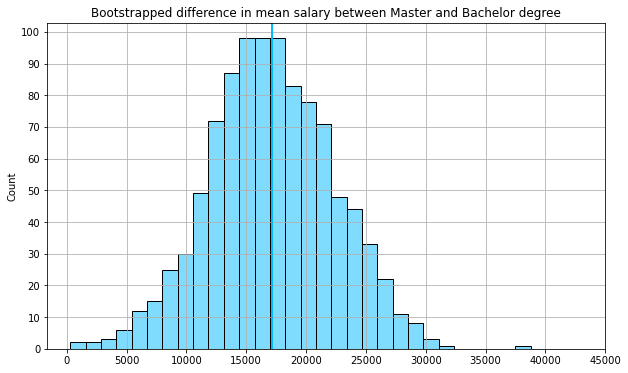

In [82]:
# plot the distribution of the difference in means
plt.figure(figsize=(10,6))

difference_plot = sns.histplot(diff_3, color = "#00BBFF", alpha=0.5, bins = 30)
plt.axvline(np.mean(diff_3), color="#00BBFF", linewidth=2)

plt.xticks(np.arange(0, 50000, 5000))
plt.yticks(np.arange(0, 110, 10))
plt.title('Bootstrapped difference in mean salary between Master and Bachelor degree')
plt.grid()
plt.savefig('f25.png',transparent = True)
plt.show()

#### d.
    ANOVA is still not suitable here.Because all bootstrapped distribution distribute normally, the normality assumption can be satisfied after bootstrapping. But from doctoral displays a higher variance(Figure 22), thus equal variance assumption is still violated. Though, the f-score is 10938.95, larger than q3.b. So, the null hypothesis still be rejected. I conclude there is at least one group mean is different than others.

In [83]:
f_test_2 = stats.f_oneway(Bachelor_sam_mean, Master_sam_mean, Doctoral_sam_mean)
f_test_2

F_onewayResult(statistic=10938.94671225457, pvalue=0.0)

#### e.

     In future, I can use bootstrapping method do inference without assuming a parametric form for the population distribution. It is very useful when normality assumption is need but violate. However, bootstrapping method can only fix distributions to normal distribution with different variance, thus this method cannot help with fixing equal variance assumption.